# Team ID - Team 8
# B Div - 5th Sem - CSE
# Overview of Hostile Post Detection in Hindi
- **Goals:** To predict the label set of the set of post collected from Twitter and facebook.

- **Traning data:** post with their label.

- **Tesing data:** set of posts.
- **Types of post:** 
1. *Fake News:* A claim or information that is verified to be not true.
2. *Hate Speech:* A post targeting a specific group of people based on their ethnicity, religious beliefs, geographical belonging, race, etc., with malicious intentions of spreading hate or encouraging violence.
3. *Offensive:* A post containing profanity, impolite, rude, or vulgar language to insult a targeted individual or group.
4. *Defamation:* A mis-information regarding an individual or group.
5. *Non-hostile:* A post without any hostility.



- **dataset.csv:** contains trainng data.


- **Team**
- **Kirti Kunj Bajbai   - 01fe18bcs094**
- Naman Anand         - 01fe18bcs119
- Himanshu Mishra     - 01fe18bcs081
- Gunjan Mahajan      - 01fe18bcs078


## Exploring dataset

In [1]:
# importing libraries
import pandas as pd     
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth',1)

#### load data

In [2]:
data = pd.read_csv("dataset.csv")

#### How many posts do we have in training set

In [3]:
print("We have", data.shape[0], "posts in the training set.")

We have 5728 posts in the training set.


#### First and last five posts of dataset

In [4]:
data.head()

,Unique ID,Post,Labels Set,Unnamed: 3,Unnamed: 4
0,1,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive",NaN,NaN
1,2,"सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\nhttps://t.co/8iy2MJSBAs",non-hostile,NaN,NaN
2,3,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर #LIVE : https://t.co/G945HvzM0Z https://t.co/KfH7xF1IdM",non-hostile,NaN,NaN
3,4,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive",NaN,NaN
4,5,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स जारी\n\n- 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n- 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n- कंटेनमेंट जोन में कोई छूट नहीं\n- सिनेमाहॉल अभी बंद रहेंगे\n- 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे. https://t.co/4e6lysg0VR,non-hostile,NaN,NaN


In [5]:
data.tail()

,Unique ID,Post,Labels Set,Unnamed: 3,Unnamed: 4
5723,5724,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate,NaN,NaN
5724,5725,"उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत; शरीर पर नहीं मिले चोट के निशान, बेटे ने पिटाई कर हत्या का दावा किया था\nhttps://t.co/YaFEzPhTDC #NirvendraMishra @Uppolice @UPGovt",non-hostile,NaN,NaN
5725,5726,"नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं https://t.co/l6kFR8eiBf #HelpYourFriend #Jobless #COVID19 https://t.co/YOKsAyndNa",non-hostile,NaN,NaN
5726,5727,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता –#रविश कुमार\n\n,fake,NaN,NaN
5727,5728,रक्षा मंत्री @rajnathsingh ने पूर्व राष्ट्रपति #PranabMukherjee के निधन पर शोक व्यक्त किया\n\nविवरण : https://t.co/aLE7aVtWy9,non-hostile,NaN,NaN


#### Information about the attributes and tupples.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unique ID   5728 non-null   int64  
 1   Post        5728 non-null   object 
 2   Labels Set  5728 non-null   object 
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 223.9+ KB


#### removing extra columns

In [7]:
data=data.drop(data.columns[[0,3,4]], axis=1)

#### New information of data 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Post        5728 non-null   object
 1   Labels Set  5728 non-null   object
dtypes: object(2)
memory usage: 89.6+ KB


In [9]:
data.head()

,Post,Labels Set
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive"
1,"सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\nhttps://t.co/8iy2MJSBAs",non-hostile
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर #LIVE : https://t.co/G945HvzM0Z https://t.co/KfH7xF1IdM",non-hostile
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive"
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स जारी\n\n- 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n- 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n- कंटेनमेंट जोन में कोई छूट नहीं\n- सिनेमाहॉल अभी बंद रहेंगे\n- 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे. https://t.co/4e6lysg0VR,non-hostile


In [10]:
data.tail()

,Post,Labels Set
5723,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate
5724,"उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत; शरीर पर नहीं मिले चोट के निशान, बेटे ने पिटाई कर हत्या का दावा किया था\nhttps://t.co/YaFEzPhTDC #NirvendraMishra @Uppolice @UPGovt",non-hostile
5725,"नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं https://t.co/l6kFR8eiBf #HelpYourFriend #Jobless #COVID19 https://t.co/YOKsAyndNa",non-hostile
5726,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता –#रविश कुमार\n\n,fake
5727,रक्षा मंत्री @rajnathsingh ने पूर्व राष्ट्रपति #PranabMukherjee के निधन पर शोक व्यक्त किया\n\nविवरण : https://t.co/aLE7aVtWy9,non-hostile


#### Calculating the null values in each columns

In [11]:
data.isnull().sum()

Post          0
Labels Set    0
dtype: int64

#### Number of columns and rows in train data set

In [12]:
data.shape
print(data.shape,"is the dimension of the data")

(5728, 2) is the dimension of the data


#### Checking for the duplicates in the dataset.

In [13]:
print(len(data['Post'])-len(set(data['Post'])))

10


#### Calculating the number and percentage of different types of post.

In [14]:
d={}
total=0
for i in data['Labels Set']:
    ar=list(i.split(','))
    for j in ar:
        try:
            d[j]+=1
        except:
            d[j]=1
        total+=1


percentageHolder={}
for i in d:
    percentageHolder[i]=str((d[i]/total)*100)[:5]+'%'



table={'count':d,'percentage':percentageHolder}
print(pd.DataFrame(table))

             count percentage
hate         792    12.58%   
offensive    742    11.79%   
non-hostile  3050   48.47%   
defamation   564    8.963%   
fake         1144   18.18%   


#### Represntation of label

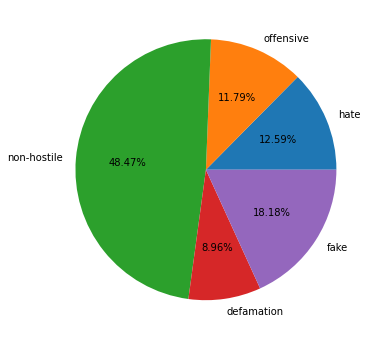

In [15]:
#pie chart creation

labels = list(d.keys())
values = list(d.values())
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels,autopct="%1.2f%%")
plt.show()

Analysis:


Data is biased towards non-hostile post.

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

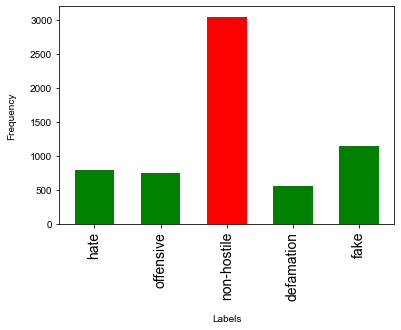

In [16]:
# Bar Plot
plt.bar(d.keys(), d.values(), 0.6, color=['g','g','r','g','g'])
plt.xlabel("Labels", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
sb.set(font_scale=1.4)
plt.xticks(fontsize=14, rotation=90)

Analysis:

1) We observe that non-hostile posts has the highest proportion i.e more than 3000.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Post        5728 non-null   object
 1   Labels Set  5728 non-null   object
dtypes: object(2)
memory usage: 89.6+ KB


In [18]:
#PREPROCESSING

In [19]:
#Checking if the duplicate posts have duplicate labels or not

temp=set()
d={}
index=0
for i in data['Post']:
    if i not in temp:
        temp.add(i)
        d[i]=[[data['Labels Set'][index],index]]
    else:
        d[i].append([data['Labels Set'][index],index])
        print(d[i])
    index+=1
        

[['fake', 1102], ['fake', 2670]]
[['offensive', 2733], ['offensive', 3128]]
[['hate', 1135], ['hate', 3217]]
[['hate,offensive', 3086], ['hate,offensive', 3409]]
[['hate,offensive', 1372], ['hate,offensive', 4523]]
[['defamation,offensive', 2850], ['defamation,offensive', 4655]]
[['hate', 2467], ['defamation,offensive', 4970]]
[['offensive', 153], ['offensive', 5037]]
[['offensive', 153], ['offensive', 5037], ['offensive', 5425]]
[['hate,offensive', 1372], ['hate,offensive', 4523], ['hate,offensive', 5550]]


In [20]:
#removing duplicate rows

postTemp={'Post':[],'Labels Set':[]}
visited=set()
index=0

for i in data['Post']:
    if i not in visited and index!=4970:
        postTemp['Post'].append(i)
        postTemp['Labels Set'].append(data['Labels Set'][index])
        visited.add(i)
    index+=1
        
data=pd.DataFrame.from_dict(postTemp)

data

,Post,Labels Set
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive"
1,"सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\nhttps://t.co/8iy2MJSBAs",non-hostile
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर #LIVE : https://t.co/G945HvzM0Z https://t.co/KfH7xF1IdM",non-hostile
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive"
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स जारी\n\n- 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n- 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n- कंटेनमेंट जोन में कोई छूट नहीं\n- सिनेमाहॉल अभी बंद रहेंगे\n- 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे. https://t.co/4e6lysg0VR,non-hostile
...,...,...
5713,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate
5714,"उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत; शरीर पर नहीं मिले चोट के निशान, बेटे ने पिटाई कर हत्या का दावा किया था\nhttps://t.co/YaFEzPhTDC #NirvendraMishra @Uppolice @UPGovt",non-hostile
5715,"नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं https://t.co/l6kFR8eiBf #HelpYourFriend #Jobless #COVID19 https://t.co/YOKsAyndNa",non-hostile
5716,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता –#रविश कुमार\n\n,fake


In [21]:
labelPost={}
punchCnt={}
hashCnt={}
mentionCnt={}

f=open("punctuations.txt","r")
puch=set(f.read().split('\n'))


for i in range(len(data['Post'])):
    for j in list(data['Labels Set'][i].split(',')):
        try:
            labelPost[j].append(data['Post'][i])
        except:
            labelPost[j]=[(data['Post'][i])]
        

#check for Punctuations

for i in labelPost:
    for j in labelPost[i]:
        for char in j:
            if char in puch:
                try:
                    punchCnt[i]+=1
                except:
                    punchCnt[i]=1

for i in labelPost:
    for j in labelPost[i]:
        for char in j:
            if char == '#':
                try:
                    hashCnt[i]+=1
                except:
                    hashCnt[i]=1
                    
for i in labelPost:
    for j in labelPost[i]:
        for char in j:
            if char == '@':
                try:
                    mentionCnt[i]+=1
                except:
                    mentionCnt[i]=1
                    
for i in punchCnt:
    punchCnt[i]/=len(labelPost[i])
for i in hashCnt:
    hashCnt[i]/=len(labelPost[i])
for i in mentionCnt:
    mentionCnt[i]/=len(labelPost[i])
    
print(punchCnt,hashCnt,mentionCnt)

{'hate': 4.361675126903553, 'offensive': 4.1961852861035425, 'non-hostile': 9.021311475409837, 'defamation': 4.329181494661921, 'fake': 3.583552055993001} {'hate': 0.35913705583756345, 'offensive': 0.2997275204359673, 'non-hostile': 1.0859016393442622, 'defamation': 0.2846975088967972, 'fake': 0.23184601924759404} {'hate': 0.6294416243654822, 'offensive': 0.9373297002724795, 'non-hostile': 0.6888524590163935, 'defamation': 0.6209964412811388, 'fake': 0.23184601924759404}


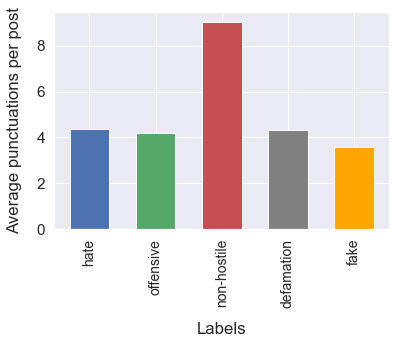

In [22]:
#avg punctuations
plt.bar(list(punchCnt.keys()), list(punchCnt.values()), 0.6, color=['b','g','r','grey','orange'])
plt.xlabel("Labels", labelpad=14)
plt.ylabel("Average punctuations per post", labelpad=14)
sb.set(font_scale=1.4)
plt.xticks(fontsize=14, rotation=90)
# for index, value in enumerate(punchCnt.values()):
#     plt.text(value, index, str(value))
plt.show()

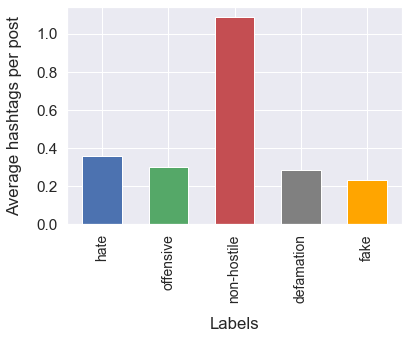

In [23]:
#avg hashtags
plt.bar(hashCnt.keys(), hashCnt.values(), 0.6, color=['b','g','r','grey','orange'])
plt.xlabel("Labels", labelpad=14)
plt.ylabel("Average hashtags per post", labelpad=14)
sb.set(font_scale=1.4)
plt.xticks(fontsize=14, rotation=90)
plt.show()

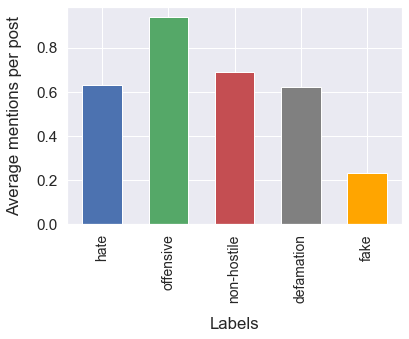

In [24]:
#avg mentions
plt.bar(mentionCnt.keys(), mentionCnt.values(), 0.6, color=['b','g','r','grey','orange'])
plt.xlabel("Labels", labelpad=14)
plt.ylabel("Average mentions per post", labelpad=14)
sb.set(font_scale=1.4)
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [25]:
#removing urls & mentions from the string

data['Post'] = data['Post'].str.replace('http\S+|www.\S+|@\S+', '', case=False)

data

,Post,Labels Set
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive"
1,"सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\n",non-hostile
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर #LIVE :",non-hostile
3,साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive"
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स जारी\n\n- 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n- 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n- कंटेनमेंट जोन में कोई छूट नहीं\n- सिनेमाहॉल अभी बंद रहेंगे\n- 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे.,non-hostile
...,...,...
5713,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate
5714,"उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत; शरीर पर नहीं मिले चोट के निशान, बेटे ने पिटाई कर हत्या का दावा किया था\n #NirvendraMishra",non-hostile
5715,"नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं #HelpYourFriend #Jobless #COVID19",non-hostile
5716,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता –#रविश कुमार\n\n,fake


In [26]:
#separating Hashtags
ht=[]


for i in data['Post']:
    temp=[]
    start=0
    for j in i:
        if j=='#':
            start=1
            holder=''
        if j==' ' and start:
            start=0
            temp.append(holder)
            
        elif start==1:
            holder+=j
    ht.append(temp)
            
data['Hashtag']=ht

data['Post'] = data['Post'].str.replace('#\S+', '', case=False)

data

,Post,Labels Set,Hashtag
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive",[]
1,"सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\n",non-hostile,[]
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर :",non-hostile,[#LIVE]
3,साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive",[]
4,- अनलॉक-4 के लिए गाइडलाइन्स जारी\n\n- 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n- 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n- कंटेनमेंट जोन में कोई छूट नहीं\n- सिनेमाहॉल अभी बंद रहेंगे\n- 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे.,non-hostile,[#unlock4guidelines]
...,...,...,...
5713,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate,[]
5714,"उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत; शरीर पर नहीं मिले चोट के निशान, बेटे ने पिटाई कर हत्या का दावा किया था\n",non-hostile,[#NirvendraMishra]
5715,"नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं",non-hostile,"[#HelpYourFriend, #Jobless, #COVID19]"
5716,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता – कुमार\n\n,fake,[#रविश]


In [27]:
#removing Punctuations

f=open("punctuations.txt","r")
punctuations=set(f.read().split('\n'))
index=0

for i in data['Post']:
    temp=''
    for j in i:
        if j not in punctuations:
            temp+=j
        else:
            temp+=' '
    data['Post'][index]=temp
    index+=1
    
data

,Post,Labels Set,Hashtag
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive",[]
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई नई स्कीमें लाती रहती है ताकि उन पर ज्यादा आर्थिक बोझ न पड़े \n\n,non-hostile,[]
2,सुशांत ने जो बिजनेस डील 9 जून को की थी वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई देखिए पूछता है भारत अर्नब के साथ रिपब्लिक भारत पर,non-hostile,[#LIVE]
3,साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive",[]
4,अनलॉक 4 के लिए गाइडलाइन्स जारी\n\n 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n कंटेनमेंट जोन में कोई छूट नहीं\n सिनेमाहॉल अभी बंद रहेंगे\n 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे,non-hostile,[#unlock4guidelines]
...,...,...,...
5713,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate,[]
5714,उप्र पीएम रिपोर्ट में खुलासा हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत शरीर पर नहीं मिले चोट के निशान बेटे ने पिटाई कर हत्या का दावा किया था\n,non-hostile,[#NirvendraMishra]
5715,नौकरी गंवा चुके दोस्त की मदद नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें चुका सकते हैं नेटफ्लिक्स और जिम की फीस हालचाल जानें लेकिन ज्यादा नहीं,non-hostile,"[#HelpYourFriend, #Jobless, #COVID19]"
5716,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता कुमार\n\n,fake,[#रविश]


In [28]:
#removing stop words 

f=open("stopWords.txt","r")
stopWords=set(f.read().split('\n'))

index=0

for i in data['Post']:
    temp=''
    words=i.split(' ')
    for j in words:
        if j not in stopWords:
            temp+=j
            temp+=' '
    data['Post'][index]=temp
    index+=1

data

,Post,Labels Set,Hashtag
0,मेरे देश के हिन्दु निराले है। पक्के राम भक्त बाबर के साले \n\n🙏 जय श्री राम 🙏,"hate,offensive",[]
1,सरकार हमेशा किसानों कमाई बढ़ाने के नई नई स्कीमें लाती ताकि आर्थिक बोझ न पड़े \n\n,non-hostile,[]
2,सुशांत बिजनेस डील 9 जून वो डील दीपेश सुशांत हत्या के दिन याद आई देखिए पूछता भारत अर्नब के रिपब्लिक भारत,non-hostile,[#LIVE]
3,साले जेएनयू छाप कमिने लोग हिन्दुओं संविधान सबको बराबर अधिकार देता है। सच्चाई बराबर अधिकार नहीं देता है।,"defamation,offensive",[]
4,अनलॉक 4 के गाइडलाइन्स जारी\n\n 7 सितंबर देशभर मेट्रो सेवा शुरु होगी\n 21 सितंबर के रैलियों बाकी फंक्शन 100 लोगों इजाजत\n कंटेनमेंट जोन छूट नहीं\n सिनेमाहॉल रहेंगे\n 9 12वीं के छात्र 21 सितंबर के स्कूल सकेंगे,non-hostile,[#unlock4guidelines]
...,...,...,...
5713,उदितराज जी हिम्मत जुटा नेता के कह दीजिये जिसके स्वागत मुंबई स्टेशन पाकिस्तान जिंदाबाद के नारे लगे विरोध दें मान्य होगा देशभक्त वरना अनर्गल प्रलाप न,hate,[]
5714,उप्र पीएम रिपोर्ट खुलासा हार्टअटैक पूर्व विधायक निर्वेंद्र मौत शरीर नहीं मिले चोट के निशान बेटे पिटाई हत्या दावा था\n,non-hostile,[#NirvendraMishra]
5715,नौकरी गंवा चुके दोस्त मदद नगद के बजाए गिफ्ट कार्ड देने के बारे सोचें चुका नेटफ्लिक्स जिम फीस हालचाल जानें नहीं,non-hostile,"[#HelpYourFriend, #Jobless, #COVID19]"
5716,बंगाल हिन्दू मरे मुझे फर्क नहीं पड़ता कुमार\n\n,fake,[#रविश]


In [29]:
#separating emojis

emojis=[]
index=0

for i in data['Post']:
    post=""
    temp=[]
    for j in i:
        if (u'\u0900' <= j <= u'\u097f' or j==' ' or j.isdigit() or j=='\n' or j.isalpha()):
            post+=j
        else:
            temp.append(j)
    emojis.append(temp)
    data['Post'][index]=post
    index=0
    
data['emojis']=emojis

data

,Post,Labels Set,Hashtag,emojis
0,रक्षा मंत्री पूर्व राष्ट्रपति के निधन शोक व्यक्त किया\n\nविवरण,"hate,offensive",[],"[🙏, 🙏]"
1,सरकार हमेशा किसानों कमाई बढ़ाने के नई नई स्कीमें लाती ताकि आर्थिक बोझ न पड़े \n\n,non-hostile,[],[]
2,सुशांत बिजनेस डील 9 जून वो डील दीपेश सुशांत हत्या के दिन याद आई देखिए पूछता भारत अर्नब के रिपब्लिक भारत,non-hostile,[#LIVE],[]
3,साले जेएनयू छाप कमिने लोग हिन्दुओं संविधान सबको बराबर अधिकार देता है। सच्चाई बराबर अधिकार नहीं देता है।,"defamation,offensive",[],[]
4,अनलॉक 4 के गाइडलाइन्स जारी\n\n 7 सितंबर देशभर मेट्रो सेवा शुरु होगी\n 21 सितंबर के रैलियों बाकी फंक्शन 100 लोगों इजाजत\n कंटेनमेंट जोन छूट नहीं\n सिनेमाहॉल रहेंगे\n 9 12वीं के छात्र 21 सितंबर के स्कूल सकेंगे,non-hostile,[#unlock4guidelines],[]
...,...,...,...,...
5713,उदितराज जी हिम्मत जुटा नेता के कह दीजिये जिसके स्वागत मुंबई स्टेशन पाकिस्तान जिंदाबाद के नारे लगे विरोध दें मान्य होगा देशभक्त वरना अनर्गल प्रलाप न,hate,[],[]
5714,उप्र पीएम रिपोर्ट खुलासा हार्टअटैक पूर्व विधायक निर्वेंद्र मौत शरीर नहीं मिले चोट के निशान बेटे पिटाई हत्या दावा था\n,non-hostile,[#NirvendraMishra],[]
5715,नौकरी गंवा चुके दोस्त मदद नगद के बजाए गिफ्ट कार्ड देने के बारे सोचें चुका नेटफ्लिक्स जिम फीस हालचाल जानें नहीं,non-hostile,"[#HelpYourFriend, #Jobless, #COVID19]",[]
5716,बंगाल हिन्दू मरे मुझे फर्क नहीं पड़ता कुमार\n\n,fake,[#रविश],[]


In [30]:
#english specific preprocessing

In [31]:
#Translating hindi to english using "googletrans" API
# import time
# errorCounter=0
# cnt=0
# eng=[]
# f = open("res.txt", "a")
# f.write("Now the file has more content!")
# for i in range(5728):
#     t=Translator()
#     cnt+=1
#     time.sleep(1)
    
#     print(cnt,errorCounter)
#     # if i%5==0:
#     #     time.sleep(1)
#     try:
#         f.write(t.translate(translationInput[i]).text)
#         f.write('\n')
#     except:
#         errorCounter+=1
# print("Total Loss = " + str(errorCounter))

In [32]:
#lowercasing 

f = open("res.txt", "r")
englishPost=list(f.read().split('\n'))

for i in range(len(englishPost)):
    englishPost[i]=englishPost[i].lower()

engDF=pd.DataFrame.from_dict({'English Post':englishPost})
engDF

,English Post
0,now the file has more content!my country is hindu very unique in. something is sure ram devotee and brother of babar jai shri ram
1,sushant has a business deal was june they deal dipesh is sushant asks killing day see i only remember why the republic of india arnab india
2,brother jnu impression kmine people constitution hindus say it gives everyone equal rights. the truth is that it does not have equal rights.
3,"after september unlock starts across metro service in september issued guidelines rallies and cinema, there is no rest allowed containment zone in function will be closed from now will be the school after the student september th"
4,record case in the country
...,...
2900,can in the next hours is arrested rhea caught another drug padlr
2901,we have seen born dogs in the house of a staunch hindu lion is seen lick tlve of these dogs.
2902,up pm report revealing was the hartatak former legislator nirvendra death marks son did not harm the body claimed the killing was beating
2903,can already think about giving gift cards instead of jobs lost cash with the help of friends learn netflix and doing gym fees but not much


In [33]:
#Stemming

from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer()
index=0

for i in englishPost:
    sentence=''
    for word in i:
        sentence+=ps.stem(word)
    englishPost[index]=sentence
    index+=0
    
engDF=pd.DataFrame.from_dict({'English Post':englishPost})
engDF

,English Post
0,
1,sushant has a business deal was june they deal dipesh is sushant asks killing day see i only remember why the republic of india arnab india
2,brother jnu impression kmine people constitution hindus say it gives everyone equal rights. the truth is that it does not have equal rights.
3,"after september unlock starts across metro service in september issued guidelines rallies and cinema, there is no rest allowed containment zone in function will be closed from now will be the school after the student september th"
4,record case in the country
...,...
2900,can in the next hours is arrested rhea caught another drug padlr
2901,we have seen born dogs in the house of a staunch hindu lion is seen lick tlve of these dogs.
2902,up pm report revealing was the hartatak former legislator nirvendra death marks son did not harm the body claimed the killing was beating
2903,can already think about giving gift cards instead of jobs lost cash with the help of friends learn netflix and doing gym fees but not much


In [34]:
#removing stop words from english

f=open("stopWordsEnglish.txt","r")
stopWordsEnglish=set(f.read().split('\n'))

index=0

for i in englishPost:
    words=i.split(' ')
    sentence=''
    for word in words:
        if word not in stopWordsEnglish:
            sentence+=word
    englishPost[index]=sentence
    index=0

engDF=pd.DataFrame.from_dict({'English Post':englishPost})
engDF

,English Post
0,
1,sushant has a business deal was june they deal dipesh is sushant asks killing day see i only remember why the republic of india arnab india
2,brother jnu impression kmine people constitution hindus say it gives everyone equal rights. the truth is that it does not have equal rights.
3,"after september unlock starts across metro service in september issued guidelines rallies and cinema, there is no rest allowed containment zone in function will be closed from now will be the school after the student september th"
4,record case in the country
...,...
2900,can in the next hours is arrested rhea caught another drug padlr
2901,we have seen born dogs in the house of a staunch hindu lion is seen lick tlve of these dogs.
2902,up pm report revealing was the hartatak former legislator nirvendra death marks son did not harm the body claimed the killing was beating
2903,can already think about giving gift cards instead of jobs lost cash with the help of friends learn netflix and doing gym fees but not much
